#Author - **JASHANDEEP SINGH**  <img align = right src="https://internship.thesparksfoundation.info/assests/img/logo.png" alt="drawing" width="100"/>  
##GRIP - The Spark Foundation- Data Science & Business Analytics Internship
#**TASK 1 Predict the percentage of a student based on the no. of study hours.**


### **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


##**Importing libraries**


Pandas,Numpy for data manuplation.

Matplotlib,Seaborn module for Data Visualisation.

Sklearn for modelling.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## **Importing Dataset**

In [28]:
# Reading data from remote link
url = "http://bit.ly/w-data"
scores = pd.read_csv(url)
print("Data imported successfully")
scores.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [29]:
print('Shape of the Dataset-->',scores.shape)
print ('Columns names -->',scores.columns)
print ('Columns Datatype -->', scores.dtypes)

Shape of the Dataset--> (25, 2)
Columns names --> Index(['Hours', 'Scores'], dtype='object')
Columns Datatype --> Hours     float64
Scores      int64
dtype: object


##**Exploratory Analysis of the DataSet**

For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.We will have to check for the following 

1.   Missing values
2.   Outliers



###Missing Values

Hours     0
Scores    0
dtype: int64


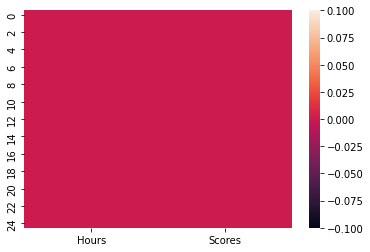

In [30]:
c = scores.isnull().sum()
print(c)
sns.heatmap(scores.isnull(), cbar=True)

Observations:
There are no missing values in this dataset.

###Outliers

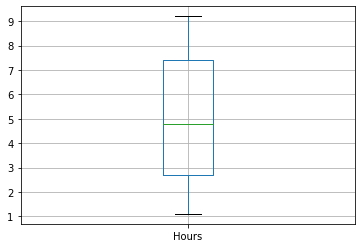

In [31]:
#percentile of each Predictors
scores.quantile([0.01,.05,.10,.15 ,.25,.5,.8,.85,0.9,.95,.99,1])
# to check the outliers in the data by plotting the boxplot
scores.boxplot(['Hours'])

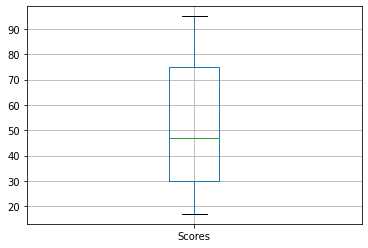

In [32]:
scores.boxplot(['Scores'])

##**Visualising Data**
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

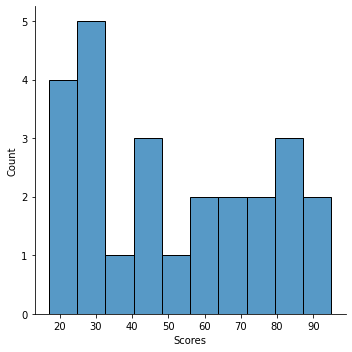

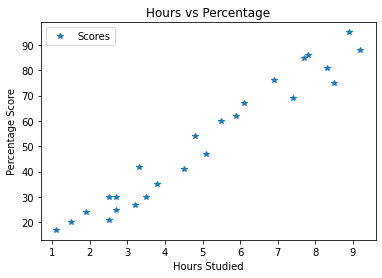

In [33]:
# Plotting the distribution of scores
sns.displot(data = scores,x = scores['Scores'], bins=10)
plt.show()

scores.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##**Preparing the training data for Linear Regression**
Independent variable = Number of hours studied

Dependent variable = Scores obtained

In [34]:
X = scores.iloc[:, :-1].values  
y = scores.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [35]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


##**Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [36]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


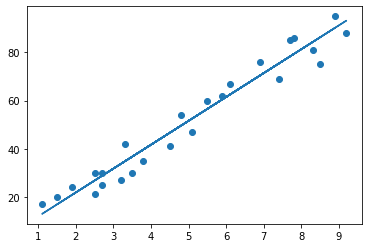

In [37]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [38]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **What will be predicted score if a student study for 9.25 hrs in a day?**

In [39]:
study_hours = 9.25
score_pred = regressor.predict([[study_hours]])
print("Number of hours = {}".format(study_hours))
print("Predicted scores = {}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores = 93.69173248737539


###Alternative way to calculate the score of the student

In [40]:
#Using the formula y = mx + c , where m = coeffiecient , c = intercept
y = regressor.coef_*9.25 + regressor.intercept_
y

array([93.69173249])

## **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 
We will evaluate our model using error metrics like :
    
    mean_absolute_error,
    mean_squared_error,
    R2_score,

In [41]:
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean square error : ',metrics.mean_squared_error(y_test,y_pred))
print('Root mean square error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Goodness of Fit-R2",metrics.r2_score(y_test,y_pred))

Mean absolute error :  4.183859899002982
Mean square error :  21.598769307217456
Root mean square error :  4.647447612100373
Goodness of Fit-R2 0.9454906892105354
